Introduccion al problema

In [1]:
%pip install gymnasium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Windows:

method 1

In [2]:
%pip install swig

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install gymnasium[box2d]

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for box2d-py
Failed to build box2d-py
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Using setuptools (version 80.2.0).
      c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: zlib/libpng License
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ********************************************

method 2

In [4]:
%pip install swig

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install ufal.pybox2d

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install pygame

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Linux:

In [7]:
# %pip install gymnasium[box2d]

https://gymnasium.farama.org/environments/box2d/lunar_lander/

In [8]:
from lunar import LunarLanderEnv

Tensorflow or Torch

In [9]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import torch
import tensorflow as tf

In [12]:
# Initialize the environment
lunar = LunarLanderEnv()
print(type(lunar.env.observation_space))
print(type(lunar.env.action_space))

<class 'gymnasium.spaces.box.Box'>
<class 'gymnasium.spaces.discrete.Discrete'>


El espacio de acciones es un valor del 0 al 3 que indica que acciones tomará el modulo lunar para esa iteración.

en concreto son las siguientes:

|value| action                        |
|-----|-------------------------------|
| 0   | do nothing                    |
| 1   | fire left orientation engine  |
| 2   | fire main engine              |
| 3   | fire right orientation engine |


In [13]:
lunar.env.action_space

Discrete(4)

El espacio de observaciones son un conjunto de valores flotantes y booleanos que indica el estado del modulo lunar.

en concreto son las siguientes:

|value| observation                               |
|-----|-------------------------------------------|
| 0   | coordenada X (float)                      |
| 1   | coordenada Y (float)                      |
| 2   | velocidad lineal X (float)                |
| 3   | velocidad lineal Y (float)                |
| 4   | Angulo en radianes desde -2π a +2π (float)|
| 5   | Velocidad angula (float)                  |
| 6   | Contacto de la pierna Izquierda (bool)    |
| 7   | Contacto de la pierna Derecha (bool)      |

In [14]:
# se muestran los valores minimos y maximos del espacio de observaciones.
lunar.env.observation_space

Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)

In [15]:
observation_count = lunar.env.observation_space.shape[0] 
action_count = lunar.env.action_space.n

print(f"observations: {observation_count}, actions: {action_count}")

observations: 8, actions: 4


In [16]:
#valores minimos y maximos para las observaciones.
print(lunar.env.observation_space.low) 
print(lunar.env.observation_space.high)

[ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ]
[ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ]


Sample ofrece una combinacion aleatoria del conjunto.

In [17]:
print(lunar.env.action_space.sample())  # Take a random action

2


In [18]:
print(lunar.env.observation_space.sample())  # Sample a random observation

[ 0.22929206  1.7747893  -4.9537973   7.9817634   3.6126506  -7.002795
  0.5467953   0.7646728 ]


Running a random episode.

In [19]:
def test_lunar_lander(steps_to_run_before_pause, agent, episodes=1):
    """
    Test the Lunar Lander environment with a given agent.
    
    Parameters:
    steps_to_run_before_pause (int): Number of steps to run before pausing for user input.
    agent: The agent to be tested in the environment.
    
    Returns:
    None
    """
    # Initialize the environment
    lunar = LunarLanderEnv(render_mode="human")
    
    if(agent is not None):
        # Set the agent's environment
        agent.lunar = lunar
        
    for _ in range(episodes):
        counter, score = 0, 0

        while True:
            if steps_to_run_before_pause != 0 and counter % steps_to_run_before_pause == 0:
                input("Press Enter to continue...")

            if(agent is not None):
                _, reward, done, action = agent.act()
                
            else:
                # Sample a random action from the action space
                action = lunar.env.action_space.sample()
            
                # Take a step in the environment
                _, reward, done = lunar.take_action(action, verbose=True)
                
            score += reward
            
            counter += 1
            
            if done:
                print(f"Episode finished, score: {score}")
                break
        if(agent is not None):
            # Reset the agent's environment for the next episode
            agent.lunar.reset()
        else:
            # Reset the environment for the next episode
            lunar.reset()
        
    # Close the environment
    lunar.close()

In [20]:
test_lunar_lander(steps_to_run_before_pause=0, agent=None, episodes=1)

Step taken: 3, New state: [-0.00452995  1.4070982  -0.22242829 -0.09796293  0.00305773  0.00749953
  0.          0.        ], Reward: 0.3212133701166817, Done: False
Step taken: 2, New state: [-0.00671482  1.4055218  -0.21904512 -0.07006272  0.00361582  0.01116256
  0.          0.        ], Reward: 1.1077749771869037, Done: False
Step taken: 1, New state: [-0.00899296  1.4033403  -0.23073776 -0.09696226  0.00651799  0.05804838
  0.          0.        ], Reward: -2.1339306941964353, Done: False
Step taken: 2, New state: [-0.01114082  1.4014452  -0.21837452 -0.08425045  0.01006041  0.07085502
  0.          0.        ], Reward: 1.1557105283526539, Done: False
Step taken: 2, New state: [-0.01340647  1.3999363  -0.22960992 -0.06708558  0.0130716   0.06022919
  0.          0.        ], Reward: -0.9668533008250393, Done: False
Step taken: 2, New state: [-0.01584797  1.3991482  -0.24639809 -0.03504145  0.01529921  0.04455625
  0.          0.        ], Reward: -1.4132915899321177, Done: False
S

DQN

In [21]:
from DQN import DQNAgent
lunar = LunarLanderEnv(render_mode=None)

2.7.0+cpu


Train

In [22]:
agent = DQNAgent(lunar,episodes=2000)
agent.train()
#añado yo
agent.save_model("modelo_DQN.h5")

QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=4, bias=True)
)
Ep    0 | Reward:  -247.11 | Eps: 0.995 | Loss: 4.7404
Ep    1 | Reward:  -244.66 | Eps: 0.990 | Loss: 5.7514
Ep    2 | Reward:  -140.02 | Eps: 0.985 | Loss: 162.9318
Ep    3 | Reward:  -183.22 | Eps: 0.980 | Loss: 57.7393
Ep    4 | Reward:   -65.17 | Eps: 0.975 | Loss: 9.0384
Ep    5 | Reward:  -224.61 | Eps: 0.970 | Loss: 29.9516
Ep    6 | Reward:   -47.15 | Eps: 0.966 | Loss: 62.2644
Ep    7 | Reward:   -25.33 | Eps: 0.961 | Loss: 2.7527
Ep    8 | Reward:  -157.62 | Eps: 0.956 | Loss: 1.4709
Ep    9 | Reward:   -54.80 | Eps: 0.951 | Loss: 43.1093
Ep   10 | Reward:   -93.50 | Eps: 0.946 | Loss: 106.8540
Ep   11 | Reward:  -307.25 | Eps: 0.942 | Loss: 40.6147
Ep   12 | Reward:  -372.42 | Eps: 0.937 | Loss: 237.4952
Ep   13 | Re

KeyboardInterrupt: 

In [23]:
agent = DQNAgent(
    lunar,
    epsilon=1.0,
    epsilon_decay=0.997,
    epsilon_min=0.01,
    learning_rate=0.0005,
    batch_size=128,
    memory_size=20000,
    episodes=2000,
    target_network_update_freq=5
)


QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=4, bias=True)
)


In [24]:
agent.train()
#añado yo
agent.save_model("modelo_DQN.h5")

Ep    0 | Reward:  -211.87 | Eps: 0.997 | Loss: 86.8058
Ep    1 | Reward:  -121.60 | Eps: 0.994 | Loss: 30.6405
Ep    2 | Reward:  -127.82 | Eps: 0.991 | Loss: 130.5483
Ep    3 | Reward:  -178.71 | Eps: 0.988 | Loss: 13.6276
Ep    4 | Reward:   -16.94 | Eps: 0.985 | Loss: 43.4398
Ep    5 | Reward:  -259.24 | Eps: 0.982 | Loss: 3.2155
Ep    6 | Reward:  -136.09 | Eps: 0.979 | Loss: 14.1221
Ep    7 | Reward:   -80.13 | Eps: 0.976 | Loss: 4.2147
Ep    8 | Reward:  -273.90 | Eps: 0.973 | Loss: 8.6868
Ep    9 | Reward:  -396.46 | Eps: 0.970 | Loss: 21.0382
Ep   10 | Reward:  -235.54 | Eps: 0.967 | Loss: 31.9915
Ep   11 | Reward:   -82.40 | Eps: 0.965 | Loss: 20.1555
Ep   12 | Reward:  -163.56 | Eps: 0.962 | Loss: 50.3623
Ep   13 | Reward:   -92.01 | Eps: 0.959 | Loss: 6.5314
Ep   14 | Reward:  -150.42 | Eps: 0.956 | Loss: 126.1080
Ep   15 | Reward:  -123.53 | Eps: 0.953 | Loss: 31.9471
Ep   16 | Reward:   -90.22 | Eps: 0.950 | Loss: 74.3243
Ep   17 | Reward:   -24.87 | Eps: 0.947 | Loss: 35

Ep    0 | Reward:   -89.16 | Eps: 0.997 | Loss: 0.0000
0
Ep    1 | Reward:  -433.32 | Eps: 0.994 | Loss: 169.2929
0
Ep    2 | Reward:    25.21 | Eps: 0.991 | Loss: 129.6076
0
Ep    3 | Reward:     9.46 | Eps: 0.988 | Loss: 121.5834
0
Ep    4 | Reward:    26.84 | Eps: 0.985 | Loss: 80.2033
0
Ep    5 | Reward:  -108.56 | Eps: 0.982 | Loss: 250.0277
0
Ep    6 | Reward:  -124.86 | Eps: 0.979 | Loss: 110.9823
0
Ep    7 | Reward:  -323.51 | Eps: 0.976 | Loss: 76.5248
0
Ep    8 | Reward:  -197.51 | Eps: 0.973 | Loss: 23.1143
0
Ep    9 | Reward:  -126.89 | Eps: 0.970 | Loss: 7.8289
0
Ep   10 | Reward:  -258.99 | Eps: 0.967 | Loss: 46.5368
0
Ep   11 | Reward:  -156.61 | Eps: 0.965 | Loss: 46.0303
0
Ep   12 | Reward:  -110.12 | Eps: 0.962 | Loss: 109.6734
0
Ep   13 | Reward:   -97.96 | Eps: 0.959 | Loss: 25.9590
0
Ep   14 | Reward:  -214.55 | Eps: 0.956 | Loss: 9.0865
0
Ep   15 | Reward:   -89.92 | Eps: 0.953 | Loss: 10.8111
0
Ep   16 | Reward:  -142.89 | Eps: 0.950 | Loss: 38.0385
0
Ep   17 | R

ValueError: x, y, and format string must not be None

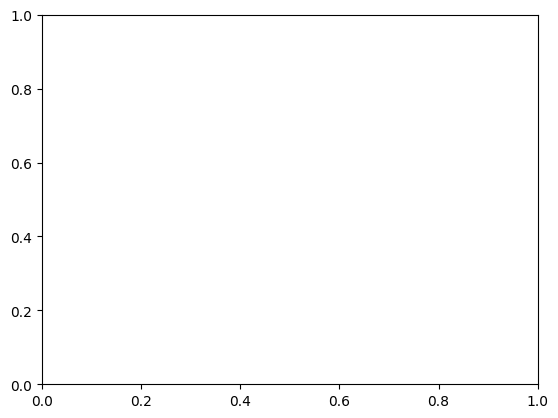

In [ ]:
import matplotlib.pyplot as plt

rewards = agent.train()  # asegúrate de que tu método train retorne la lista

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.axhline(y=200, color='r', linestyle='--', label='Solved Threshold')
plt.title('Training Progress')
plt.legend()
plt.grid()
plt.show()


Test

In [ ]:
# agent with epsilon = 0.0 (no exploration)
agent = DQNAgent(lunar, epsilon=0.0)
agent.load_model("modelo_DQN.h5")

QNetwork:
 DQN(
  (fc1): Linear(in_features=8, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=4, bias=True)
)


FileNotFoundError: [Errno 2] No such file or directory: 'modelo_DQN.h5'

In [ ]:
test_lunar_lander(steps_to_run_before_pause=25, agent=agent, episodes=1)

REINFORCE

In [ ]:
from REINFORCE import REINFORCEAgent
lunar = LunarLanderEnv(render_mode=None)

In [ ]:
# agent = REINFORCEAgent(lunar, episodes=5000)
# agent.load_model("modelo_REINFORCE.h5")

In [ ]:
agent = REINFORCEAgent(lunar)
agent.load_model("modelo_REINFORCE.h5")

In [ ]:
test_lunar_lander(steps_to_run_before_pause=75, agent=agent, episodes=1)